# Maquinas generadoras de vectores de soporte

## Imports

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Quadratic programming solver.
import cvxopt

## Datos de ejemplo: monedas

In [12]:
dataset = pd.read_csv('../data/coins.csv')
dataset.head(5)

,size,weight,type
0,2.251690,2.385475,$1
1,1.942471,2.071512,$1
2,2.966826,3.316406,$5
3,2.329461,1.464435,$1
4,2.098560,2.154872,$1


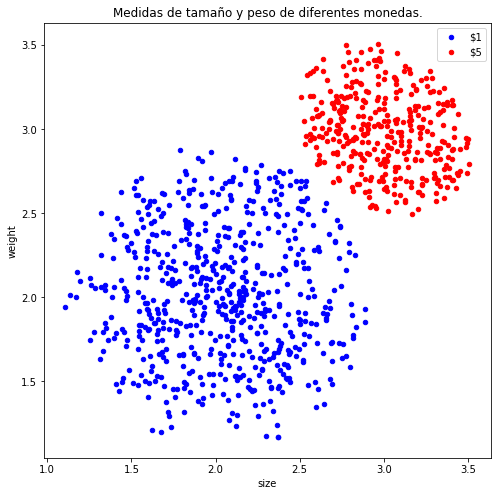

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = dataset[dataset.type == '$1'].plot.scatter('size', 'weight', c='blue', ax=ax)
dataset[dataset.type == '$5'].plot.scatter('size', 'weight', c='red', ax=ax)
ax.legend(['$1', '$5'])
ax.set_title('Medidas de tamaño y peso de diferentes monedas.');

## Our optimization problem
Minimize w.r.t to $\alpha$ subject to $\alpha_n \geq 0$ for $n = 1, ..., N$ and  $\sum_{n=1}^N\alpha_n y_n = 0$,
$$ \mathcal{L}(\alpha) = \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N y_n y_m\alpha_n\alpha_m\mathrm{x}_n^\intercal\mathrm{x}_m  - \sum_{n=1}^N\alpha_n $$

# Quadratic programing

A quadratic program (QP) is written in standard form as:

\begin{equation*}
\begin{array}{rl}
\mathrm{minimize} & (1/2) x^T P x + q^T x \\
\mathrm{subject\ to} & G x \leq h \\
    & A x = b
\end{array}
\end{equation*}

Here, $x$ is the vector of optimization variables $x_1,…,x_n$. The matrix $P$ and vector $q$ are used to define any quadratic objective function on these variables, while the matrix-vector couples $(G,h)$ and $(A,b)$ respectively define inequality and equality constraints. Vector inequalities apply coordinate by coordinate.

In [1]:
def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
    P = .5 * (P + P.T)  # make sure P is symmetric
    args = [matrix(P), matrix(q)]
    if G is not None:
        args.extend([matrix(G), matrix(h)])
        if A is not None:
            args.extend([matrix(A), matrix(b)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return numpy.array(sol['x']).reshape((P.shape[1],))

## Recover our model